In [1]:
import os
os.environ['PROJ_LIB'] = '/data/keeling/a/sshu3/anaconda2/share/proj'
from mpl_toolkits.basemap import Basemap, cm, shiftgrid,maskoceans
from netCDF4 import Dataset as NetCDFFile
import numpy as N
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy.ma as ma
from scipy.interpolate import griddata
from pyresample import geometry,image, kd_tree


In [2]:
nclu=NetCDFFile('FW_rcp45_max.nc','r')
ncvar_maize_tmp = nclu.variables['FW'][:]
latnc = nclu.variables['latitude'][:]
# znc = nclu.variables['level'][:]
lonnc = nclu.variables['longitude'][:]
# timenc = nclu.variables['time'][:]

nclu1=NetCDFFile('FW_rcp85_max.nc','r')
ncvar_maize_tmp_85 = nclu1.variables['FW'][:]

nclu2=NetCDFFile('fw_frac_max.nc','r')
ncvar_hist_tmp = nclu2.variables['FW'][:]

ncvar_hist = ncvar_hist_tmp[0,:,:]
ncvar_maize = ncvar_maize_tmp[0,:,:]
ncvar_maize_85 = ncvar_maize_tmp_85[0,:,:]

nonwet_45 = 1 - ncvar_maize
nonwet_85 = 1 - ncvar_maize_85

#ncvar_maize[ncvar_maize<=0] = -1.0
#ncvar_maize_85[ncvar_maize_85<=0] = -1.0

## Mask out outside the permafrost region.
#ncmk=NetCDFFile('surfdata_05x05.nc','r')
#ncvar_mask = ncmk.variables['PFMASK'][:]

#ncvar_maize[ncvar_mask<1] = ma.masked
#ncvar_maize_85[ncvar_mask<1] = ma.masked
#nonwet_45[ncvar_mask<1] = ma.masked
#nonwet_85[ncvar_mask<1] = ma.masked

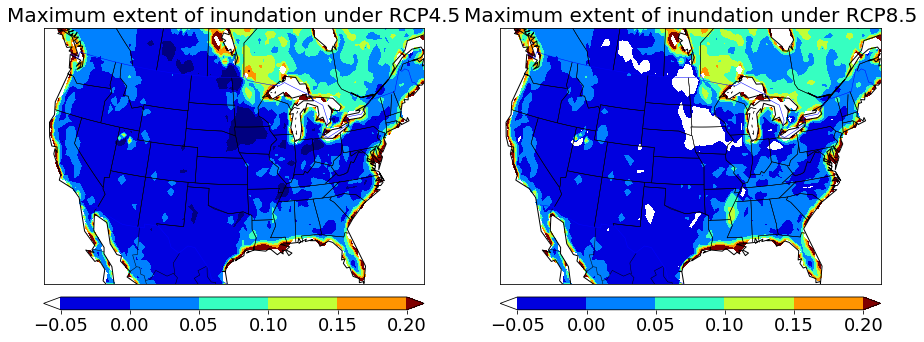

In [3]:
#http://matplotlib.org/basemap/users/mapsetup.html

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(121)
ax1.set_title("Maximum extent of inundation under RCP4.5",fontsize=20)
map = Basemap(llcrnrlon=-119,llcrnrlat=23,urcrnrlon=-63,urcrnrlat=51,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
#map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = N.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
clevs = N.arange(-0.05,0.25,0.05)

#ncvar_maize[0,0,:,:][N.isnan(ncvar_maize[0,0,:,:])] = -9999
#maize[0,1,:,:][N.isnan(maize[0,1,:,:])] = -9999
#ncvar_maize[:,:] = ma.masked_where(ncvar_maize[:,:]<0,ncvar_maize[:,:])

cs1 = map.contourf(x,y,ncvar_maize[:,:]-ncvar_hist[:,:],clevs,cmap=plt.cm.jet,vmin=-0.05,vmax=0.25,extend='both')
#cs1 = map.contourf(x,y,ncvar_maize[:,:]-ncvar_hist[:,:],cmap=plt.cm.jet,vmin=0,vmax=0.5,extend='both')

#cs1 = map.pcolormesh(x,y,ncvar_maize[0,:,:],cmap=plt.cm.jet,vmin=0,vmax=0.35)
cbar = map.colorbar(cs1,location='bottom',pad="5%")
#plt.title('Maize harvested area fraction')
cbar.ax.tick_params(labelsize=18) 
cs1.cmap.set_under('white')

ax2 = fig.add_subplot(122)
ax2.set_title("Maximum extent of inundation under RCP8.5",fontsize=20)
map = Basemap(llcrnrlon=-119,llcrnrlat=23,urcrnrlon=-63,urcrnrlat=51,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
#map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
clevs = N.arange(-0.05,0.25,0.05)
cs = map.contourf(x,y,ncvar_maize_85[:,:]-ncvar_hist[:,:],clevs,cmap=plt.cm.jet,vmin=-0.05,vmax=0.25,extend='both')
#cs = map.contourf(x,y,ncvar_maize_85[:,:]-ncvar_hist[:,:],cmap=plt.cm.jet,vmin=0,vmax=0.5,extend='both')

cbar = map.colorbar(cs,location='bottom',pad="5%")
cbar.ax.tick_params(labelsize=18) 

plt.show()
#plt.savefig('Change_Proj_SWAMPS.jpg',dpi=300)

IndexError: too many indices for array

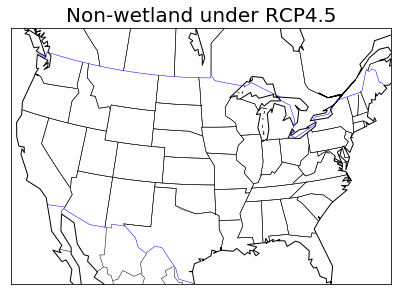

In [4]:
#http://matplotlib.org/basemap/users/mapsetup.html
# A plot for non-wetland...

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(121)
ax1.set_title("Non-wetland under RCP4.5",fontsize=20)
map = Basemap(llcrnrlon=-119,llcrnrlat=23,urcrnrlon=-63,urcrnrlat=51,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = N.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
# clevs = N.arange(0,7,0.5)
clevs = clevs = N.arange(0.6,1.0,0.05)

nonwet_45[0,:,:] = ma.masked_where(nonwet_45[0,:,:]<0,nonwet_45[0,:,:])
mdata = maskoceans(lon, lat, nonwet_45[0,:,:])

cs1 = map.contourf(x,y,nonwet_45[0,:,:],clevs,cmap=plt.cm.jet,vmin=0.6,vmax=1.0,extend='both')
cbar = map.colorbar(cs1,location='bottom',pad="5%")
cbar.ax.tick_params(labelsize=18) 
#cs1.cmap.set_under('white')

ax2 = fig.add_subplot(122)
ax2.set_title("Non-wetland under RCP8.5",fontsize=20)
map = Basemap(llcrnrlon=-119,llcrnrlat=23,urcrnrlon=-63,urcrnrlat=51,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
clevs = N.arange(0.6,1.0,0.05)
cs = map.contourf(x,y,nonwet_85[0,:,:],clevs,cmap=plt.cm.jet,vmin=0.6,vmax=1.0,extend='both')

cbar = map.colorbar(cs,location='bottom',pad="5%")
cbar.ax.tick_params(labelsize=18) 

plt.show()
#plt.savefig('Proj_SWAMPS_non_wetland.jpg',dpi=300)